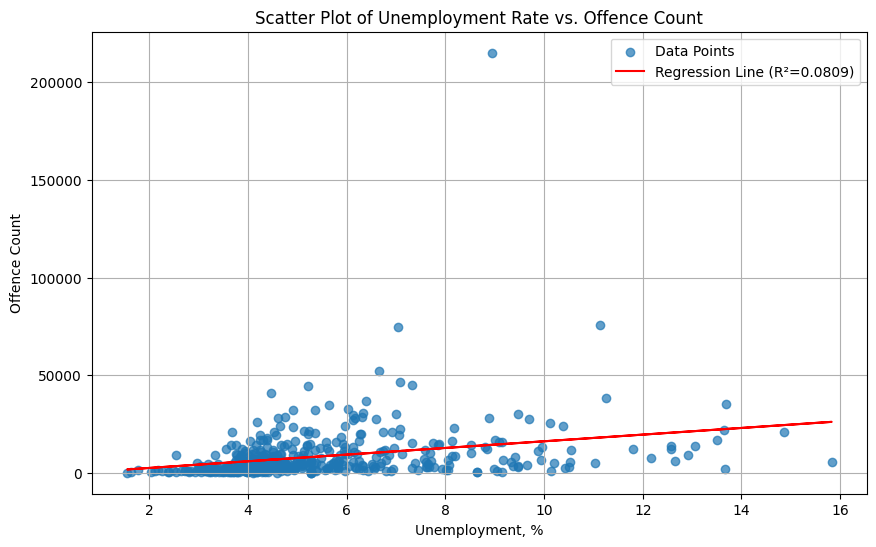

Linear Regression Coefficients: [1706.20692046]
Intercept: -878.4354502261176
R² Score: 0.08088966015330812


In [13]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def extract_suburb_type(community_name):
    regex_pattern = r'\((Suburb|suburb)\)'
    matches = re.findall(regex_pattern, community_name)
    return matches[0] if matches else None

def suburb_unemployment_vs_offences():
    
    communities_df = pd.read_csv('imputed_data_communities.csv')
    communities_df['Type'] = communities_df['Community Name'].apply(extract_suburb_type)
    suburbs_df = communities_df[communities_df['Type'] == 'Suburb'].copy()
    percent_unemployed_col = 'Unemployed, %'
    suburbs_df = suburbs_df[['Community Name', percent_unemployed_col]]
 
    suburbs_category_df = pd.read_csv('suburb_analysis.csv')
    suburbs_category_df = suburbs_category_df[['Community Name', 'Category']]
    
    suburb_offences_df = pd.read_excel('LGA Offences.xlsx', sheet_name='Table 03')
    
    suburbs_df['Community Name'] = suburbs_df['Community Name'].str.replace(r' \((Suburb|suburb)\)', '', regex=True).str.strip().str.lower()
    suburb_offences_df['Suburb/Town Name'] = suburb_offences_df['Suburb/Town Name'].str.strip().str.lower()
    
    suburb_offences_grouped = suburb_offences_df.groupby('Suburb/Town Name')['Offence Count'].sum().reset_index()
    
    #initial suburb data with offence count merge
    merged_suburbs_df = pd.merge(suburbs_df, suburb_offences_grouped, left_on='Community Name', right_on='Suburb/Town Name', how='inner')
    merged_suburbs_df['Community Name'] = merged_suburbs_df['Community Name'].str.lower()
    merged_suburbs_df = merged_suburbs_df.drop(columns=['Suburb/Town Name'])
    
   #second merge with suburb geographical categories
    merged_suburbs_df = pd.merge(merged_suburbs_df, suburbs_category_df, on='Community Name', how='left')
    merged_suburbs_df.to_csv('merged_suburb_unemployed_offenses_with_categories.csv', index=False)

    plt.figure(figsize=(10, 6))
    plt.scatter(merged_suburbs_df[percent_unemployed_col], merged_suburbs_df['Offence Count'], alpha=0.7, label='Data Points')

    X = merged_suburbs_df[[percent_unemployed_col]].values.reshape(-1, 1)  
    y = merged_suburbs_df['Offence Count'].values  
    
    regressor = LinearRegression()
    regressor.fit(X, y)
    
    y_pred = regressor.predict(X)
    
    plt.plot(merged_suburbs_df[percent_unemployed_col], y_pred, color='red', label=f'Regression Line (R²={regressor.score(X, y):.4f})')
    
    plt.title('Scatter Plot of Unemployment Rate vs. Offence Count')
    plt.xlabel('Unemployment, %')
    plt.ylabel('Offence Count')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Linear Regression Coefficients: {regressor.coef_}")
    print(f"Intercept: {regressor.intercept_}")
    print(f"R² Score: {regressor.score(X, y)}")

    return


suburb_unemployment_vs_offences()



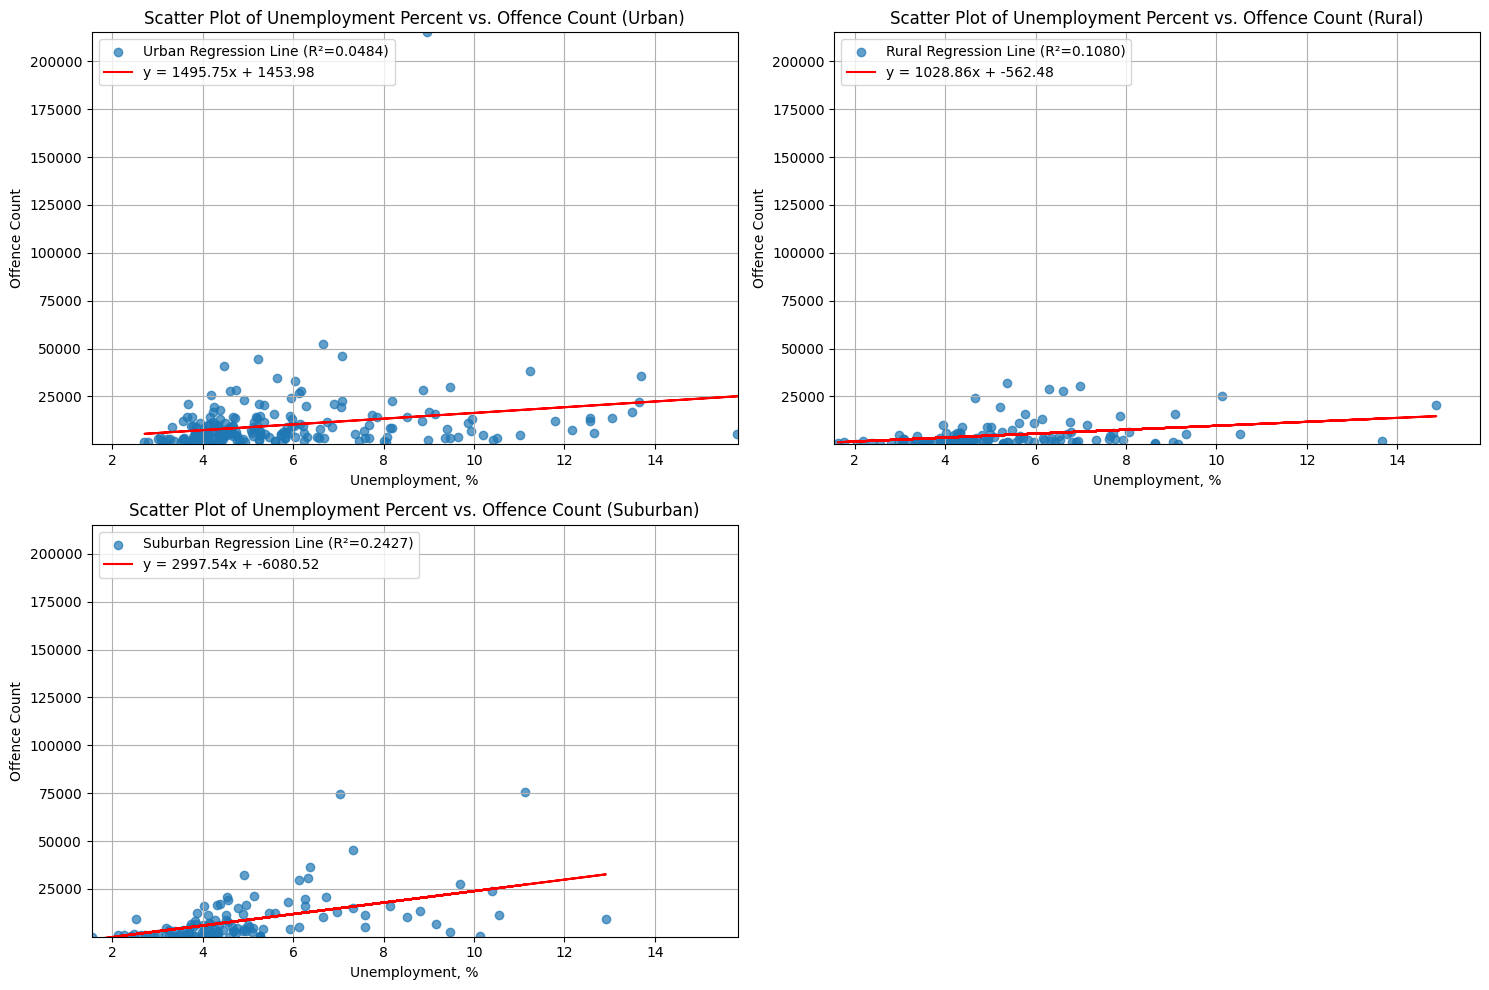

Correlation coefficient between Unemployed, % and Offence Count for Urban: 0.2200
Correlation coefficient between Unemployed, % and Offence Count for Rural: 0.3287
Correlation coefficient between Unemployed, % and Offence Count for Suburban: 0.4926


In [12]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import re
import matplotlib.pyplot as plt

def suburb_unemployment_vs_offences():
    communities_df = pd.read_csv('imputed_data_communities.csv')
    communities_df['Type'] = communities_df['Community Name'].apply(extract_suburb_type)
    suburbs_df = communities_df[communities_df['Type'] == 'Suburb'].copy()
    percent_unemployed_col = 'Unemployed, %'
    suburbs_df = suburbs_df[['Community Name', percent_unemployed_col]]

    suburbs_category_df = pd.read_csv('suburb_analysis.csv')
    suburbs_category_df = suburbs_category_df[['Community Name', 'Category']]
    
    suburb_offences_df = pd.read_excel('LGA Offences.xlsx', sheet_name='Table 03')
    
    suburbs_df['Community Name'] = suburbs_df['Community Name'].str.replace(r' \((Suburb|suburb)\)', '', regex=True).str.strip().str.lower()
    suburb_offences_df['Suburb/Town Name'] = suburb_offences_df['Suburb/Town Name'].str.strip().str.lower()
    
    suburb_offences_grouped = suburb_offences_df.groupby('Suburb/Town Name')['Offence Count'].sum().reset_index()
    
    merged_suburbs_df = pd.merge(suburbs_df, suburb_offences_grouped, left_on='Community Name', right_on='Suburb/Town Name', how='inner')
    merged_suburbs_df['Community Name'] = merged_suburbs_df['Community Name'].str.lower()
    merged_suburbs_df = merged_suburbs_df.drop(columns=['Suburb/Town Name'])
    
    merged_suburbs_df = pd.merge(merged_suburbs_df, suburbs_category_df, on='Community Name', how='left')
    merged_suburbs_df.to_csv('merged_suburb_unemployed_offenses_with_categories.csv', index=False)

    plt.figure(figsize=(15, 10))

    categories = merged_suburbs_df['Category'].unique()

    x_min = merged_suburbs_df[percent_unemployed_col].min()
    x_max = merged_suburbs_df[percent_unemployed_col].max()
    y_min = merged_suburbs_df['Offence Count'].min()
    y_max = merged_suburbs_df['Offence Count'].max()

    for i, category in enumerate(categories):

        category_df = merged_suburbs_df[merged_suburbs_df['Category'] == category]

        plt.subplot(2, 2, i + 1)  
        plt.scatter(category_df[percent_unemployed_col], category_df['Offence Count'], alpha=0.7, label=f'{category} Data Points')

        X = category_df[[percent_unemployed_col]].values.reshape(-1, 1)  
        y = category_df['Offence Count'].values 
        
        model = LinearRegression()
        model.fit(X, y)
        
        regression_line = model.predict(X)
        
        plt.plot(category_df[percent_unemployed_col], regression_line, color='red')

        equation_str = f"y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}"
        
        plt.legend([f'{category} Regression Line (R²={model.score(X, y):.4f})', equation_str], loc="upper left")

        plt.title(f'Scatter Plot of Unemployment Percent vs. Offence Count ({category})')
        plt.xlabel('Unemployment, %')
        plt.ylabel('Offence Count')
        plt.grid(True)

        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)

    plt.tight_layout()
    plt.show()

    for category in categories:
        category_df = merged_suburbs_df[merged_suburbs_df['Category'] == category]
        correlation = category_df[percent_unemployed_col].corr(category_df['Offence Count'])
        print(f"Correlation coefficient between {percent_unemployed_col} and Offence Count for {category}: {correlation:.4f}")

suburb_unemployment_vs_offences()
